In [ ]:
from matplotlib import pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch import nn
import numpy as np

transform = transforms.ToTensor()

criterion = nn.CrossEntropyLoss()

batch_size = 64

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

dataiter = iter(trainloader)
images, labels = next(dataiter)

class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 14 * 14, n_dim)
        self.fc2 = nn.Linear(n_dim, 512)
        self.fc3 = nn.Linear(512, 10)

        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.batchnorm1(self.conv1(x)))
        x = self.act(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)

        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)

        return x

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.legend()
    plt.show()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:05<00:00, 1937158.09it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 163342.39it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1452787.12it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4541246.43it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Epoch   0 | Loss: 923.0995360463858
Epoch   1 | Loss: 264.0891903080046
Epoch   2 | Loss: 183.290323253721
Epoch   3 | Loss: 141.72065664455295
Epoch   4 | Loss: 115.26284207031131
Epoch   5 | Loss: 97.24111388623714
Epoch   6 | Loss: 84.66493675205857
Epoch   7 | Loss: 75.04540698975325
Epoch   8 | Loss: 67.59488800819963
Epoch   9 | Loss: 61.556615012232214
Epoch  10 | Loss: 56.75766559550539
Epoch  11 | Loss: 52.52035016170703
Epoch  12 | Loss: 48.763431512517855
Epoch  13 | Loss: 45.487108977045864
Epoch  14 | Loss: 42.66853525629267
Epoch  15 | Loss: 39.98369313264266
Epoch  16 | Loss: 37.537110133329406
Epoch  17 | Loss: 35.597432281356305
Epoch  18 | Loss: 33.35046475380659
Epoch  19 | Loss: 31.78946572903078
Epoch  20 | Loss: 30.092003388796
Epoch  21 | Loss: 28.698803568375297
Epoch  22 | Loss: 27.235651759430766
Epoch  23 | Loss: 25.721743640722707
Epoch  24 | Loss: 24.62105987899122
Epoch  25 | Loss: 23.36074837471824
Epoch  26 | Loss: 22.252589482348412
Epoch  27 | Loss: 21

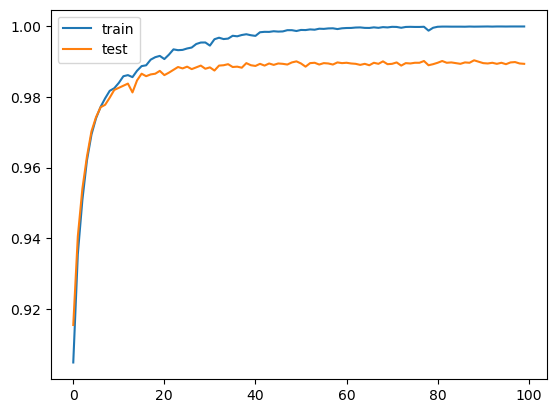

In [ ]:
train_accuracy, test_accuracy = [], []

model = Model(28 * 28 * 1, 1024)

from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 100

for epoch in range(n_epochs):
  total_loss = 0.
  test_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)

    #Use CrossEntropyLoss
    loss = criterion(preds, labels)

    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # test
  model.eval()

  # accuracy test
  train_accuracy.append(accuracy(model, trainloader))
  test_accuracy.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

plot_acc(train_accuracy, test_accuracy)

# 설명


---



##   모델

 * Convolution 레이어 2층 : 연산량을 줄이거나 주요 특징을 추출하는 용도
  
 * MaxPooling 레이어 1층 : 연산량을 크게 줄이는 용도
  
 * FullyConnected 레이어 2층 : 추출한 특징들에 대해 사고하는 용도



---


##   Cross Entropy 사용의 이유 :

  mnist 의 기본적인 레이블은 0에서 9까지의 정수로, 이는 레이블에 상하관계가 있다는 착각을 일으킬 위험이 있음.

  예를들어 4와 5가 유사하고 4와 9는 많이 다르다거나 하지 않음. 모든 레이블이 독립적인 상태. 따라서 4라면 "0 0 0 0 1 0 0 0 0 0" 와 같이 표현하는 것이 적합함.

  이런식으로 원-핫 인코딩을 할 경우, 확률 분포를 통한 분류 모델에 적합한 Softmax 활성 함수와 Cross Entropy 를 사용하는 것이 좋음.


---


##   Batch Norm 사용 이유 :

  Batch Norm 사용 유무에 따른 초기 학습 속도의 차이가 컸음. Batch Norm의 기능은 통상 과적합 방지로 알고있었기 때문에 이는 의외의 모습임.

  추측하기로는, 4층 이상 쌓인 레이어의 경우 상위 레이어의 출력값 변화가 변화폭이 상당하고, 이것이 하위 레이어들의 학습에 많은 영향을 줌. 여기서 Batch Norm 이 상위 레이어의 출력값 변화폭을 안정시켜 하위 레이어들의 학습을 안정시킨게 아닐까 싶음.


---

## 왜 정확도를 기준으로 하지 않고, 별도의 Loss Function을 사용하는가

Loss 와 달리 정확도는 갑자기 변할 수 있음. 이는 마치 기울기 폭발과 비슷한 문제를 일으켜 학습에 방해가 되는 경우가 많다고 알려짐. 반면 Loss 는 비교적 안정적 추세를 보임.
